# **2 Homework ADM**
#### Group #4
Components of the group:
* Capocello Erica
* De Risi Simona
* Petrucci Ilaria

## Research Questions

### RQ1
*After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.*

In [2]:
#Erica

### RQ2
*Let's explore the dataset by finding simple insights regarding the profile and posts.*

* Plot the number of posts for each profile in descending order.
* What posts have the highest number of "likes"?
* What posts have the most and the least number of comments?
* How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.
* How many posts include only photos? How many also have videos?
* What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [3]:
#Ilaria

### RQ3
*Now it's important to understand the most common times in which users publish their posts*

* What is the most common time in which users publish their posts?
* Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.
* Use the function that you created in the previous literal to plot the number of posts between the following time intervals:
Initial time	Final time
06:00:00	10:59:59
11:00:00	13:59:59
14:00:00	16:59:59
17:00:00	19:59:59
20:00:00	23:59:59
00:00:00	02:59:59
03:00:00	05:59:59


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [43]:
#initialize a counter for the times of the posts
c = Counter()
#divide in chunks the file
for chunk in tqdm(pd.read_csv('~/Documents/Data_Science/ADM/homeworks/instagram_posts.csv', delimiter = '\t', chunksize = 250000, parse_dates=['cts'], date_parser=pd.to_datetime)):
    #update the counter with the times of the posts in the current chunk
    chunk_times = [t.time() for t in chunk.cts if not pd.isnull(t)]
    c.update(chunk_times)
print("The most common time in which users publish their posts is: ", c.most_common(1)[0][0] )

171it [06:57,  2.44s/it]

The most common time in which users publish their posts is:  21:00:09


In [63]:
#or to be precised at the minute and not at the second:
#initialize a counter for the times of the posts
c2 = Counter()
#divide in chunks the file
for chunk in tqdm(pd.read_csv('~/Documents/Data_Science/ADM/homeworks/instagram_posts.csv', delimiter = '\t', chunksize = 250000, parse_dates=['cts'], date_parser=pd.to_datetime)):
    #update the counter with the times of the posts in the current chunk
    chunk_times = [t.time().isoformat(timespec = 'minutes') for t in chunk.cts if not pd.isnull(t)]
    c2.update(chunk_times)
print("The most common time in which users publish their posts is: ", c2.most_common(1)[0][0] )


171it [07:50,  2.75s/it]

The most common time in which users publish their posts is:  18:00


In [ ]:
#other version with multithreading:

import threading
import _thread

# Declraing a lock
lock = threading.Lock()

#initialize a counter for the times of the posts
c_mt = Counter()

#Function for the thread
def update_counter(start_point):
    global c_mt
    chunk = pd.read_csv('~/Documents/Data_Science/ADM/homeworks/instagram_posts.csv', delimiter = '\t', nrows=500000, skiprows=start_point)
    #update the counter with the times of the posts in the current chunk
    chunk_times = [t.time() for t in chunk.cts if not pd.isnull(t)]
    lock.acquire()
    c_mt.update(chunk_times)
    lock.release()

#divide in 8 chunks the file
count = 0
while(count<42710197):
    for t in range(8):
        _thread.start_new_thread(update_counter, (count,))
        count += 500000
    
print("The most common time in which users publish their posts is: ", c_mt.most_common(1)[0][0] ) 

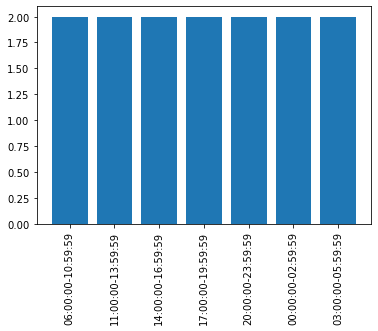

In [3]:
def plot_interval_posts(intervals, counter):
    '''
    Function that takes in input 
    - a list of time intervals  
    - a Counter providing the number of posts of every possible time (among the ones in the file) 
    Returns the number of posts between each one of the time intervals
    '''
    #initialize the output array
    val = np.zeros(len(intervals), dtype = int32)
    #err = 0
    #for every value in the Counter, check in which interval is comprehended
    for ti in counter:
        for interval, i in zip(intervals, range(7)):
            if ti >= interval[0] and ti <= interval[1]:
                val[i] += counter[ti]
                break
            #err+=1
    #print(err)
    return val

#define the time intervals
intervals = [(datetime.time(6,0,0), datetime.time(10,59,59)), (datetime.time(11,0,0), datetime.time(13,59,59)), 
             (datetime.time(14,0,0), datetime.time(16,59,59)), (datetime.time(17,0,0), datetime.time(19,59,59)),
            (datetime.time(20,0,0), datetime.time(23,59,59)),(datetime.time(0,0,0), datetime.time(2,59,59)), (datetime.time(3,0,0), datetime.time(5,59,59))]

#plot
plt.bar(np.array([str(interval[0]) + '-'+str(interval[1]) for interval in intervals]),plot_interval_posts(intervals, c))
plt.xticks(rotation=90)
plt.show()

### RQ4
*n most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.*

* Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.
* Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that * have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.
* What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?
* Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

In [5]:
#Ilaria

### RQ5
*The most influential users are the ones with the highest number of “followers", you can now look more into their activity.*

* Plot the top 10 most popular users in terms of followers and their number of posts.
* Who is the most influential user?
* Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.
* How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.
* How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [6]:
#Ilaria

### RQ6
*It's time to get information from the user posting effectiveness.*

* What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.
* Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

In [7]:
#Simona

### RQ7
*Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.*

* What's the probability that a post receives more than 20% "likes" of the number of followers a user has?
* Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

In [8]:
#Erica

### RQ8
*Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.*

* Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.
* Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.
* What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.
* What are histograms, bar plots, scatterplots and pie charts used for?
* What insights can you extract from a Box Plot?

In [9]:
#Erica

### Bonus points
1. Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

2. Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

3. Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

In [10]:
#Simona

## Command Line Question

#Simona

## Algorithmic Questions

### AQ1
* What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)
* What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?
* Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

In [11]:
#Erica

### AQ2
*Considering the following problem, answer the questions:*
Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

* Each piece of the cut should have an integer length
* He should at least cut the ribbon once
* The multiplication of the length of all the pieces be the maximum possible
Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.
1. Show that the algorithm has exponential running time.
2. Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.
3. Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).
4. (Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

In [12]:
#Ilaria